In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import pickle

pd.options.mode.chained_assignment = None  # default='warn'
ROOT = os.path.dirname(os.getcwd())

In [86]:
#metrics
player_network_base = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'player_passing_networks_exploration.pkl.gz'))
zone_network_base = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'zonal_passing_networks_exploration.pkl.gz'))
lane_intensity = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'zone_lane_info_clustered.pkl.gz')) #includes cluster assignment for k=2
lane_cluster_centers = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'zone_lane_info_cluster_centers.pkl.gz')).sort_index()
advance_ratio = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'advance_ratio.pkl.gz'))
player_network_advanced = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'player_network_algorithms.pkl.gz'))
defensive_metrics_normalized = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'defensive_metrics_normalized_by_possession.pkl.gz'))
atts_defense = ['possession',
        'yellow_card/possession',
        'total_fouls/possession',
        'dangerous_ball_lost/possession',
        'interception_total/possession',
        'interception_inside_box/possession',
        'sliding_tackle_total/possession',
        'sliding_tackle_inside_box/possession',
        'fraction_slide_tackles_in_box',
        'fraction_interception_in_box',
        'centroid_slidetackles_interceptions_y',
        'centroid_slidetackles_interceptions_x',
        'fouls_committed',
        'yellow_card_per_foul_committed']
defensive_metrics_normalized  = defensive_metrics_normalized [atts_defense]

#performance
match_goals_wins = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'matches_goals_wins.pkl.gz'))
performance = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'team_performance.pkl.gz'))

In [125]:
df = pd.concat([player_network_base,
                zone_network_base,
                lane_intensity[['cluster']].droplevel(1, axis=1).rename({'cluster': 'passing_lane_cluster'}, axis=1), #Only considering clusters for now
                advance_ratio,
                player_network_advanced,
                defensive_metrics_normalized], axis=1)

#df = df.drop(columns = ['w'])

#Taking Z-score cross sectionally to make visualization/interpretation easier
df = (df - df.mean())/df.std()
feats_pre_aggregation = df.copy()

df = df.mean(level=1)

display(df)
[c for c in df.columns]

,w,mean_passes_players,std_passes_players,mean_passes_zone,std_passes_zone,passing_lane_cluster,advance_ratio,avg_clustering_coefficient,algebraic_connectivity,avg_shortest_path_all_pairs,...,interception_total/possession,interception_inside_box/possession,sliding_tackle_total/possession,sliding_tackle_inside_box/possession,fraction_slide_tackles_in_box,fraction_interception_in_box,centroid_slidetackles_interceptions_y,centroid_slidetackles_interceptions_x,fouls_committed,yellow_card_per_foul_committed
1609,1.349828,1.383719,1.210821,1.318559,0.867277,0.724807,0.942581,0.823521,0.285888,-0.880856,...,-0.597264,-0.422298,-0.133271,-0.257925,-0.066614,-0.024418,0.172948,0.138608,-0.581559,-0.165173
1631,-0.397137,-0.397221,-0.301509,-0.378376,-0.317825,-0.120642,-0.192044,-0.149539,-0.290168,0.328468,...,0.302106,0.217524,-0.151535,0.088878,0.081405,-0.070312,0.241299,-0.140117,-0.751208,0.021291
1625,2.334912,2.365047,2.181653,1.979032,2.122256,0.777647,1.175104,1.124108,0.691276,-1.303436,...,-1.063364,-0.916467,-0.742564,-0.284857,-0.161170,-0.934855,-0.346821,0.999070,-0.817856,0.079033
1651,-0.487124,-0.419253,-0.485131,-0.467881,-0.515815,-0.649047,-0.168505,-0.119321,-0.177045,0.352794,...,0.512890,0.591098,0.444890,0.555335,0.160648,0.510576,-0.275684,-0.560393,-0.454322,-0.137114
1610,0.868509,0.868324,0.854223,1.049378,0.537053,0.249242,0.598036,0.376209,0.362013,-0.740960,...,-0.408897,-0.321480,-0.598932,-0.109132,0.163372,-0.185342,-0.074649,0.180856,-0.763326,-0.453184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,-0.127797,-0.176530,0.012015,-0.108863,-0.052318,-0.067801,0.193723,-0.027754,-0.174856,0.116355,...,-0.033450,0.254082,0.052223,0.119893,0.109072,0.737538,0.257581,-0.686276,0.012214,0.094905
3193,-0.213421,-0.244486,-0.207834,-0.173746,-0.314987,-0.067801,-0.114388,-0.451490,0.118772,0.046617,...,-0.046088,0.055746,-0.134127,-0.168932,-0.153556,0.289883,0.102781,-0.157528,0.399984,-0.079843
3315,-0.610156,-0.612468,-0.520994,-0.528771,-0.644817,-0.384845,-0.268647,-0.508007,-0.414971,0.583858,...,0.639122,0.527137,0.094643,0.044424,0.011577,0.188628,-0.195003,-0.128205,0.012214,0.291158
3163,-0.366379,-0.409122,-0.425246,-0.298520,-0.205507,-0.279164,-0.015855,-0.321380,0.186651,0.170748,...,0.424784,0.320519,-0.422358,-0.165915,0.018282,0.136027,-0.318745,-0.313487,0.315159,-0.097209


['w',
 'mean_passes_players',
 'std_passes_players',
 'mean_passes_zone',
 'std_passes_zone',
 'passing_lane_cluster',
 'advance_ratio',
 'avg_clustering_coefficient',
 'algebraic_connectivity',
 'avg_shortest_path_all_pairs',
 'possession',
 'yellow_card/possession',
 'total_fouls/possession',
 'dangerous_ball_lost/possession',
 'interception_total/possession',
 'interception_inside_box/possession',
 'sliding_tackle_total/possession',
 'sliding_tackle_inside_box/possession',
 'fraction_slide_tackles_in_box',
 'fraction_interception_in_box',
 'centroid_slidetackles_interceptions_y',
 'centroid_slidetackles_interceptions_x',
 'fouls_committed',
 'yellow_card_per_foul_committed']

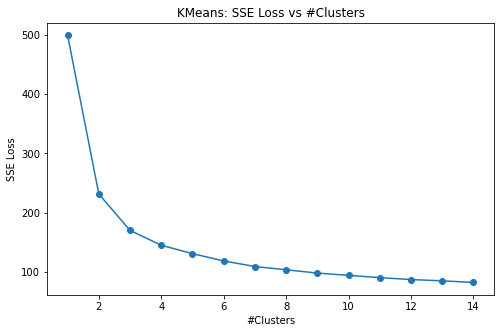

In [126]:
from sklearn.cluster import KMeans


plt.figure(figsize=(8, 5))
plt.plot([i for i in range(1,15)],
         [KMeans(n_clusters=i, random_state=0).fit(df.fillna(0)).inertia_ for i in range(1,15)], 'o-')

plt.title('KMeans: SSE Loss vs #Clusters')
plt.xlabel('#Clusters')
plt.ylabel('SSE Loss')
#plt.savefig('../figures/passing_lane_k_means/elbow_curve.png', bbox_inches='tight')
plt.show()


**Elbow = 2 Clusters**

In [127]:
kmeans_classifier = KMeans(n_clusters=2, random_state=0).fit(df.fillna(0))
df['CLUSTER_GLOBAL'] = kmeans_classifier.labels_

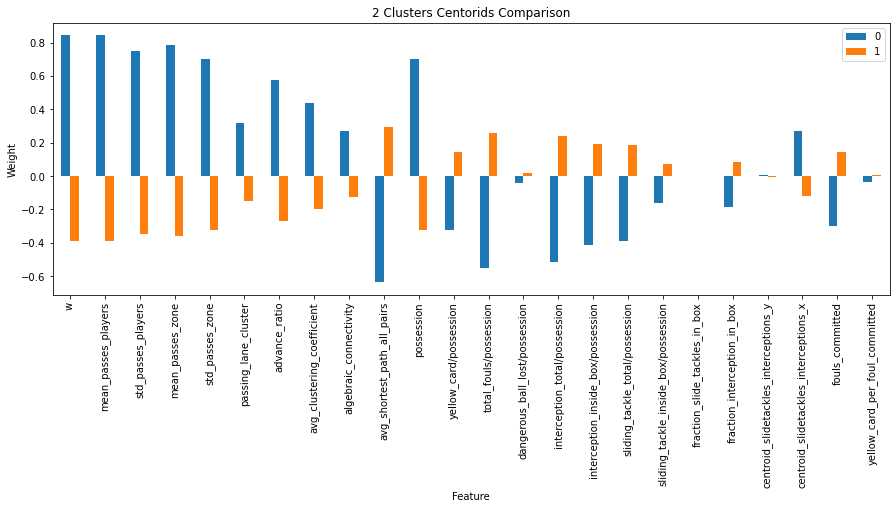

In [128]:
cluster_centers = pd.DataFrame(kmeans_classifier.cluster_centers_).iloc[:, :].T
cluster_centers.index = df.columns[:-1]
cluster_centers.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('2 Clusters Centorids Comparison')
plt.show()

### Remark
Here we see a very clear separation between offensive(blue), dominant and defensive(orange), reserved playing syles. It might be a good idea to:  

1) See performance discrepencies across these two tyles  
2) See how often the same team hold on to its playing style of we analyze performances instead of team  
3) Can we get reasonable interpretations with more clusters?  
4) Try MI to see which features are most important for indicating performance  
5) Try an attribution study and hierarchical clustering (need to study these first)

**Perfromance dicrepencies**

In [129]:
df_combined = pd.concat([df, performance], axis=1)

df_combined.loc[df_combined['CLUSTER_GLOBAL']==0, 'name']

675             Real Madrid
676               Barcelona
680                 Sevilla
684              Real Betis
687           Real Sociedad
692           Celta de Vigo
714              Las Palmas
1609                Arsenal
1610                Chelsea
1611      Manchester United
1612              Liverpool
1624      Tottenham Hotspur
1625        Manchester City
2444    Bayern M\u00fcnchen
2446       Bayer Leverkusen
2447      Borussia Dortmund
2454    Borussia M'gladbach
2975             RB Leipzig
3157                  Milan
3158                   Roma
3159               Juventus
3161         Internazionale
3162                  Lazio
3164              Sampdoria
3172               Atalanta
3187                 Napoli
3766     Olympique Lyonnais
3767                    PSG
3771    Olympique Marseille
3775                   Nice
3776                  Lille
Name: name, dtype: object

In [154]:
df_combined.loc[df_combined['CLUSTER_GLOBAL']==1, 'name'].head(50)

674                     Valencia
677     Deportivo La Coru\u00f1a
678                Athletic Club
679         Atl\u00e9tico Madrid
682                   Villarreal
683                  M\u00e1laga
691                     Espanyol
695                      Levante
696        Deportivo Alav\u00e9s
698                       Getafe
701                        Eibar
712                 Legan\u00e9s
756                       Girona
1613            Newcastle United
1619                 Southampton
1623                     Everton
1627        West Bromwich Albion
1628              Crystal Palace
1631              Leicester City
1633             West Ham United
1639                  Stoke City
1644                     Watford
1646                     Burnley
1651      Brighton & Hove Albion
1659             AFC Bournemouth
1673           Huddersfield Town
2443               Werder Bremen
2445                   Stuttgart
2449                  Schalke 04
2450                Hamburger SV
2451      

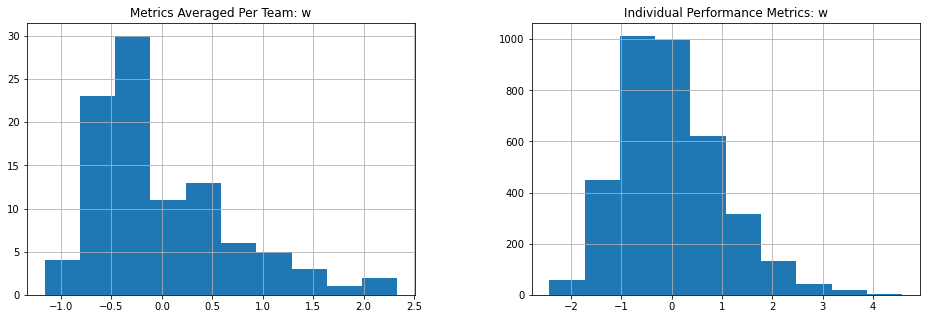

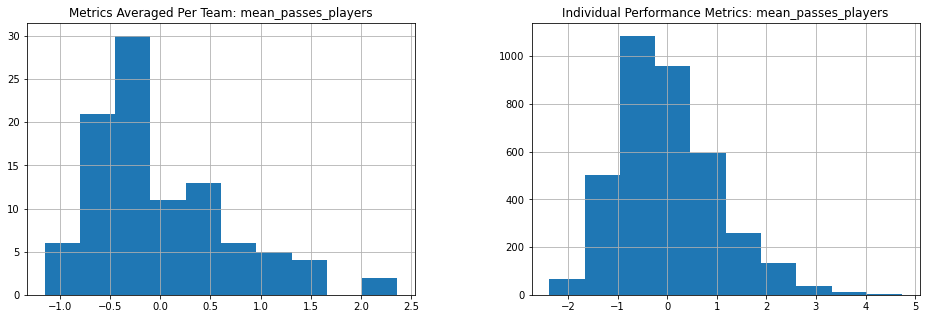

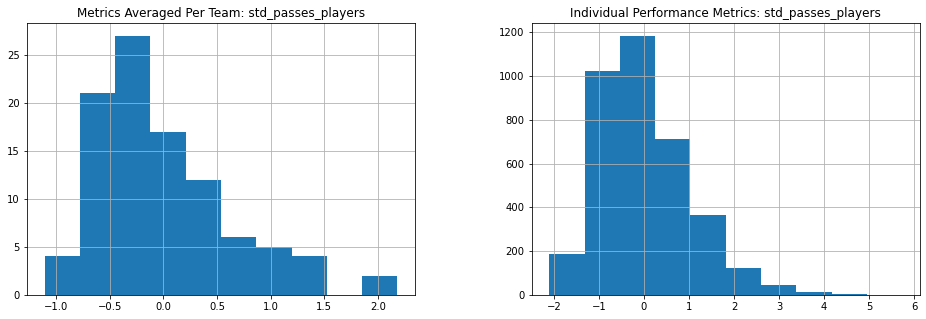

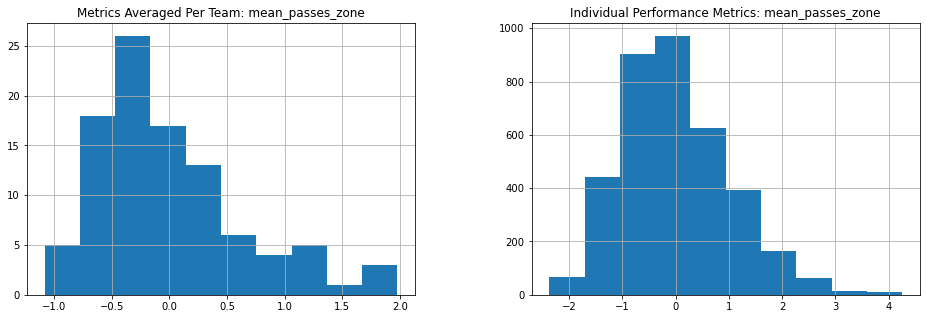

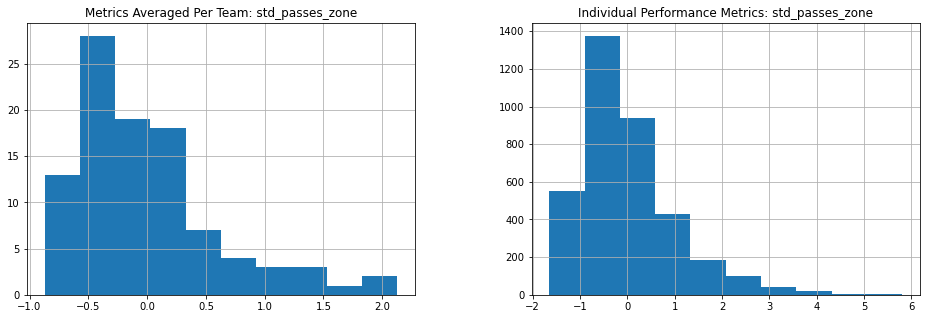

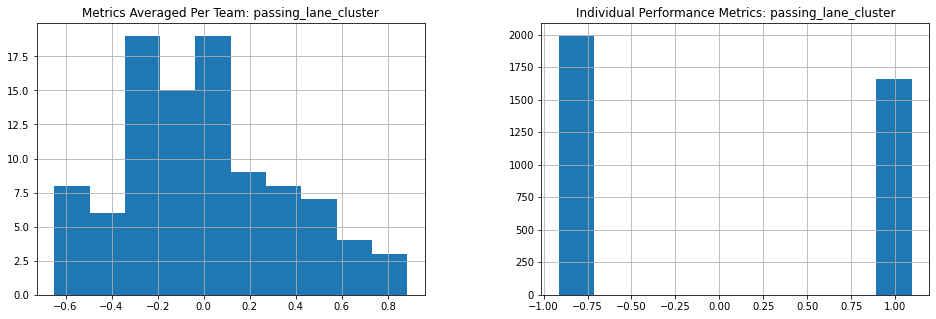

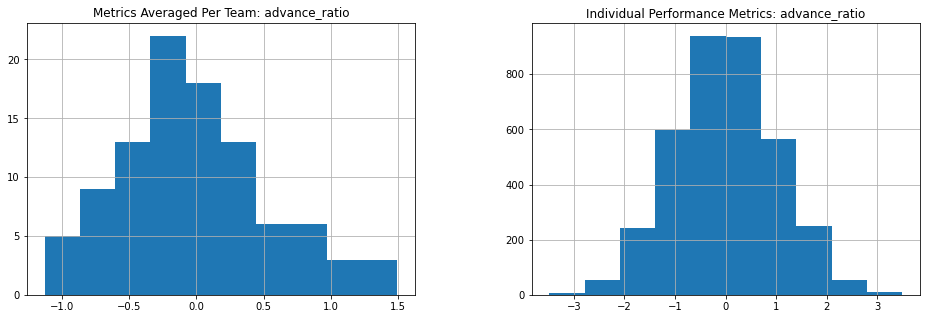

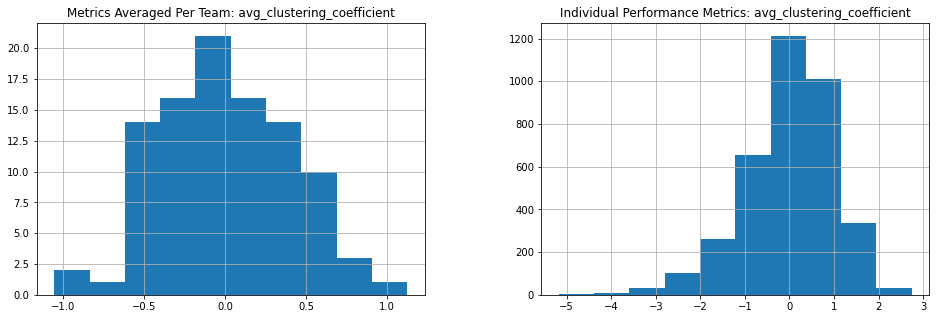

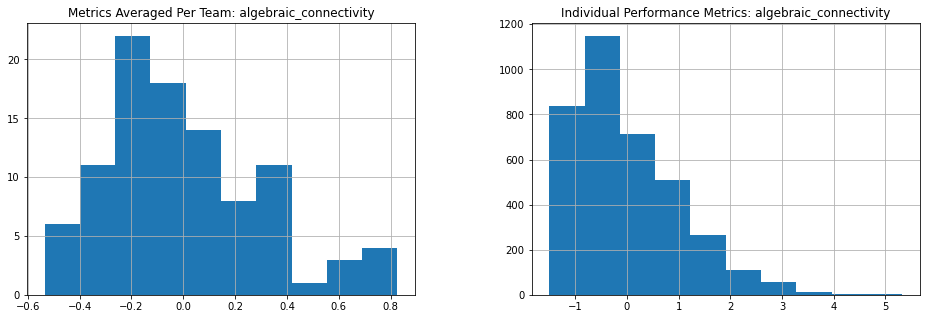

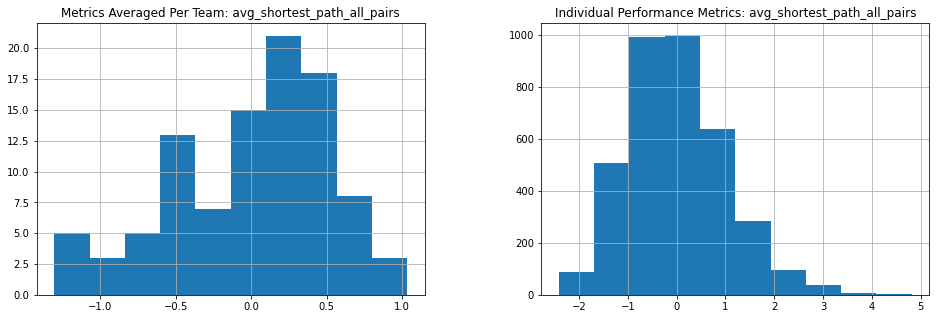

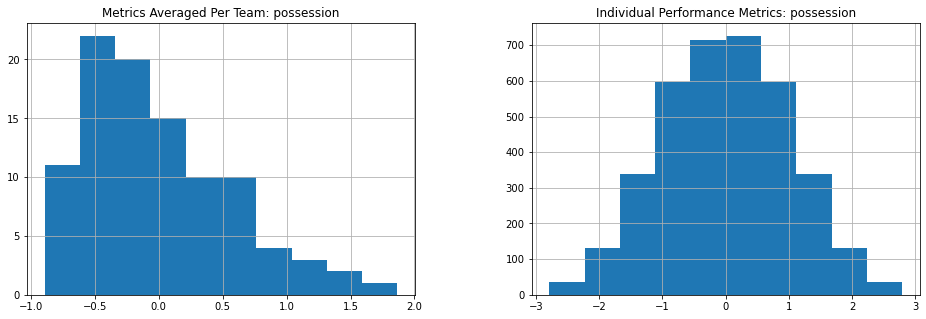

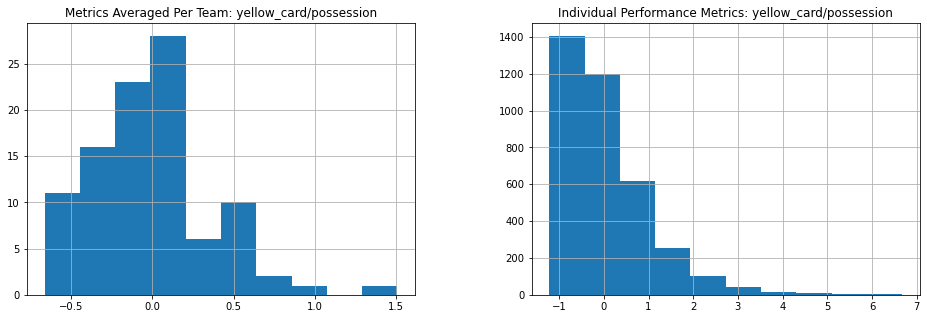

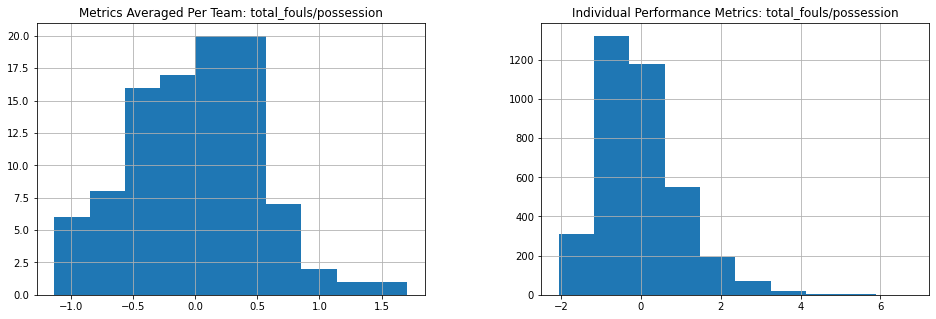

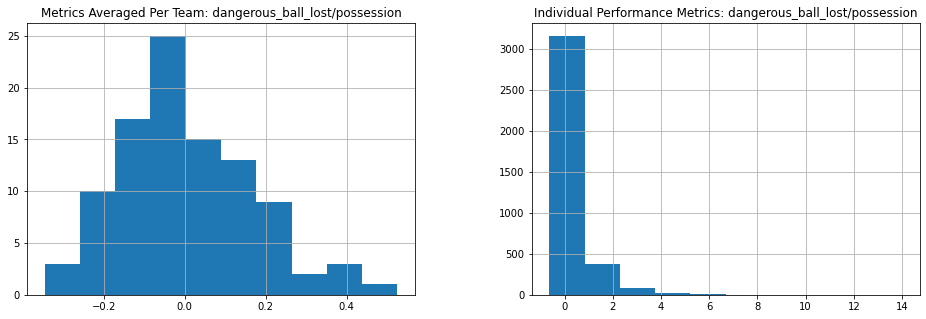

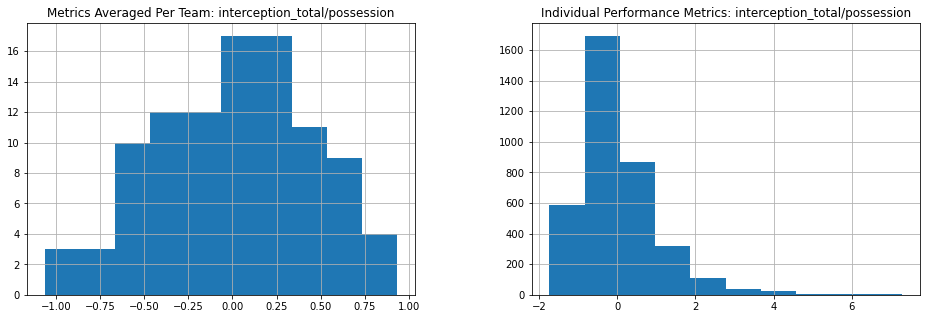

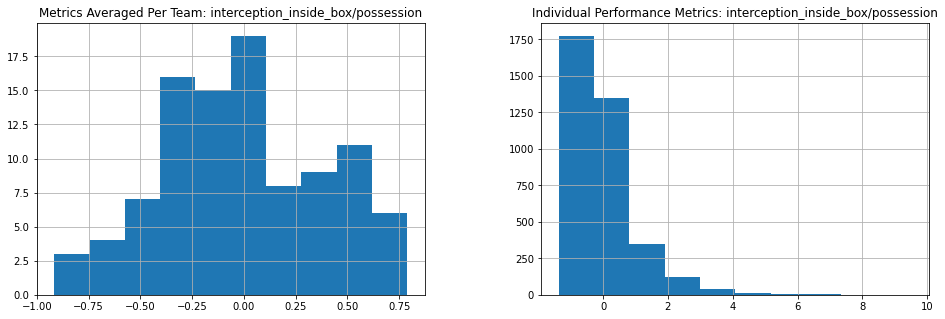

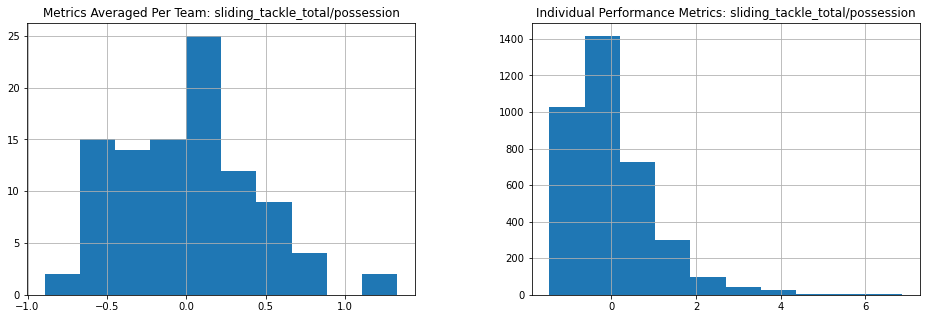

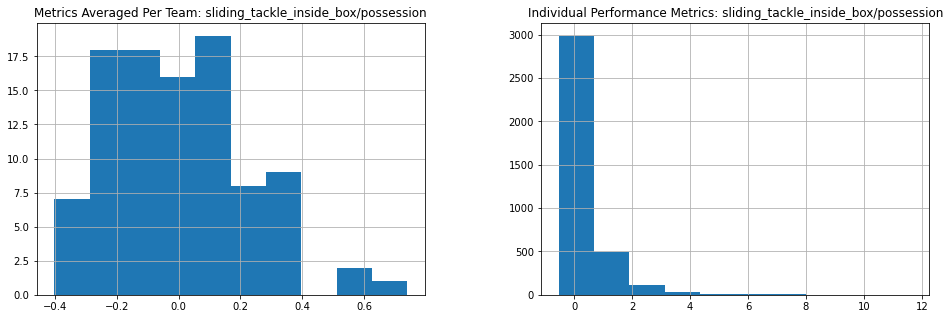

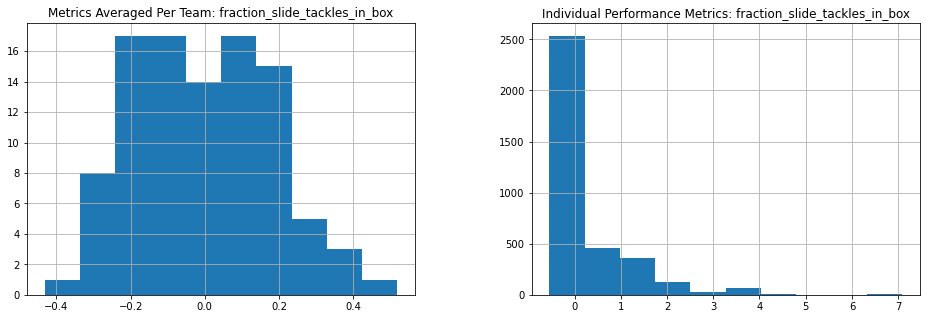

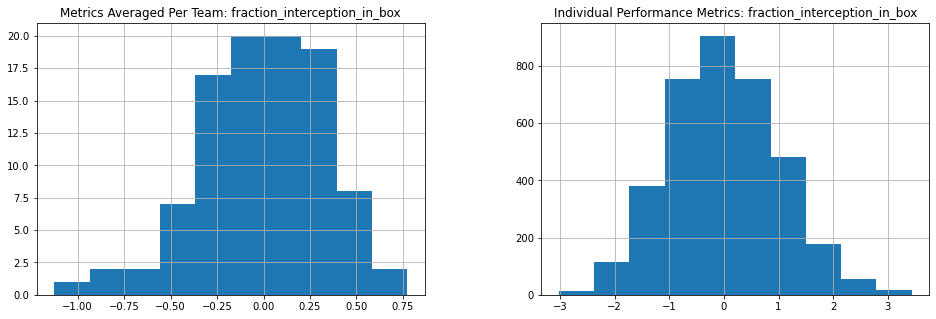

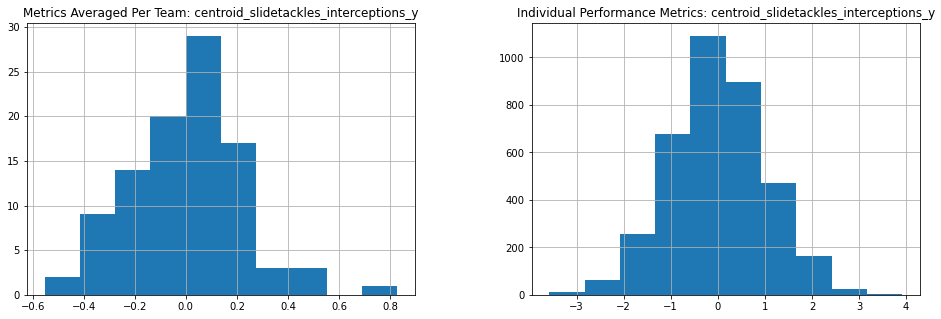

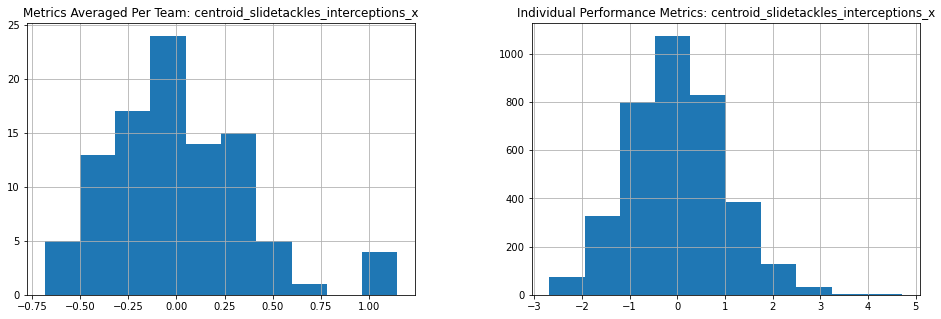

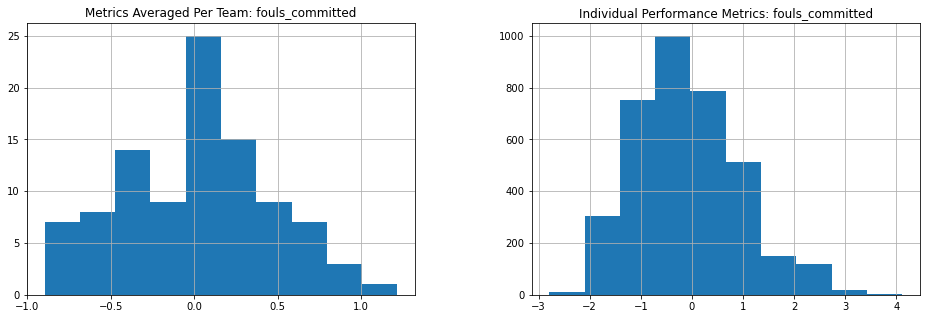

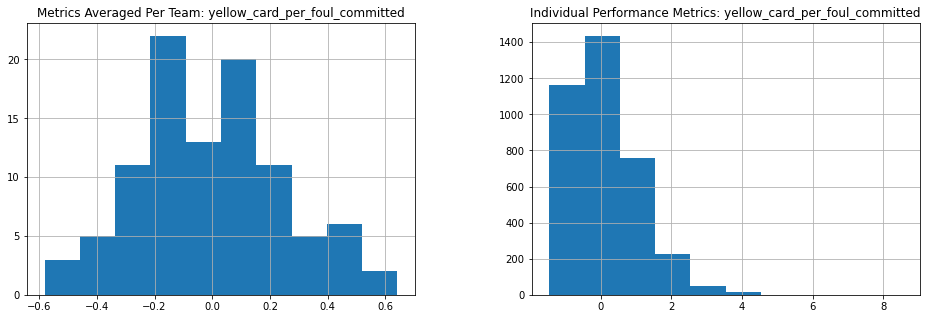

In [147]:

for c in feats_pre_aggregation.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
    
    df[[c]].hist(ax = ax[0])
    ax[0].set_title('Metrics Averaged Per Team: {}'.format(c))
    
    feats_pre_aggregation[[c]].hist(ax = ax[1])
    ax[1].set_title('Individual Performance Metrics: {}'.format(c))
    
    plt.show()
    plt.close()

#### Lets look at clusters

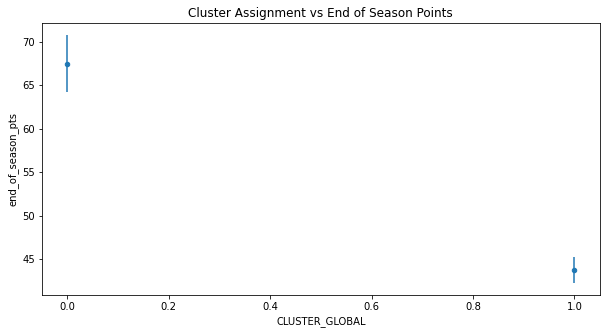

In [174]:
df_plot = df_combined[['CLUSTER_GLOBAL', 'end_of_season_pts']].groupby(['CLUSTER_GLOBAL']).mean().reset_index()
errors = df_combined[['CLUSTER_GLOBAL', 'end_of_season_pts']].groupby(['CLUSTER_GLOBAL']).sem()
df_plot.plot(kind='scatter', x='CLUSTER_GLOBAL', y='end_of_season_pts', 
             yerr=errors['end_of_season_pts'], title = 'Cluster Assignment vs End of Season Points',
            figsize = (10, 5))
plt.show()